# Fundamental Analysis
This notebook plots various fundamental statistics of different stocks.  
These links were helpful:  
https://simply-python.com/2015/02/13/getting-historical-financial-statistics-of-stock-using-python/
http://stackoverflow.com/questions/40139537/scrape-yahoo-finance-financial-ratios  
https://automatetheboringstuff.com/chapter11/  

In [1]:
import pandas as pd
import numpy as np
import requests
from pprint import pprint as pp
import matplotlib.pyplot as plt
from pattern.web import URL
%matplotlib inline

In [2]:
tickers = pd.read_csv('csv/tsx60.csv',delimiter=",")
print tickers["Sector"].unique()
tickers.head()

['Materials' 'Consumer Staples' 'Energy' 'Financials'
 'Telecommunication Services' 'Information Technology' 'Industrials'
 'Consumer Discretionary' 'Utilities' 'Health Care']


,Symbol,Company,Sector
0,AEM.TO,Agnico Eagle Mines Limited,Materials
1,AGU.TO,Agrium Inc.,Materials
2,ATD-B.TO,Alimentation Couche-Tard Inc.,Consumer Staples
3,ARX.TO,ARC Resources Ltd.,Energy
4,BMO.TO,Bank of Montreal,Financials


In [32]:
def get_stock_financials(stock):
    path = "Fundamental_Analysis/"
    skiprows = [19,20,31,41,42,43,48,58,53,64,65,72,73,95,101,102]
    try:
        d = pd.read_csv('%s%s_keyratios.csv'%(path, stock), header=2, index_col=0, skiprows = skiprows)
    except:
        webpage = "http://financials.morningstar.com/ajax/exportKR2CSV.html?t=%s&culture=en-CA&region=USA&order=asc&r=314562"%stock
        url = URL(webpage)
        f = open('%s%s_keyratios.csv'%(path, stock), 'wb') # save as test.gif
        f.write(url.download())
        f.close()
        d = pd.read_csv('%s%s_keyratios.csv'%(path, stock), header=2, index_col=0, skiprows = skiprows)
    d = d.transpose().reset_index()
    d = d.dropna(axis='columns', how='all')
    return d

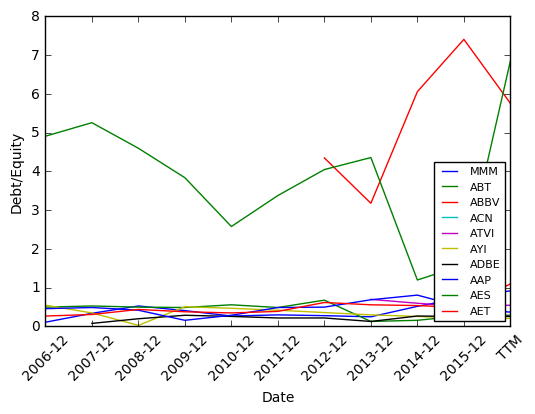

In [35]:
#stocks = ['RY', 'BMO', 'TD', 'CM', 'BNS']
stocks = pd.read_csv('csv/s&p500.csv',delimiter=",")
#var = "Earnings Per Share USD"
var = "Debt/Equity"
for s in stocks["Symbol"][0:10]:
    try:
        s = s.split(".TO")[0]
        d = get_stock_financials(s)
        y = d[var]
        plt.plot(y, label=s)
    except:
        print "skipping %s"%s

plt.xticks(range(len(y)), d['index'], rotation=45);
plt.legend(loc='lower right', fontsize=8);
plt.ylabel(var)
plt.xlabel("Date")

# Extra

In [42]:
data = get_stock_financials("AET")
data.tail()

,index,Revenue USD Mil,Gross Margin %,Operating Income USD Mil,Operating Margin %,Net Income USD Mil,Earnings Per Share USD,Dividends USD,Payout Ratio % *,Shares Mil,...,Total Liabilities & Equity,Current Ratio,Quick Ratio,Financial Leverage,Debt/Equity,Days Sales Outstanding,Payables Period,Receivables Turnover,Fixed Assets Turnover,Asset Turnover
6,2012-12,"36,600",29.7,"3,984",10.9,"1,658",4.81,0.70,14.5,345,...,100.00,0.97,0.78,3.99,0.62,15.57,38.77,23.44,66.72,0.91
7,2013-12,"47,294",25.5,"3,403",7.2,"1,913",5.33,0.80,15.7,359,...,100.00,0.77,0.59,3.56,0.56,21.47,39.16,16.99,74.96,1.04
8,2014-12,"58,003",26.0,"4,254",7.3,"2,040",5.68,0.90,14.6,359,...,100.00,0.77,0.58,3.69,0.54,26.49,43.34,13.78,83.36,1.12
9,2015-12,"60,337",27.4,"4,855",8.0,"2,390",6.78,1.00,14.9,353,...,100.00,0.82,0.65,3.32,0.49,26.35,49.66,13.85,92.86,1.13
10,TTM,"62,475",26.6,"4,943",7.9,"2,452",6.93,1.00,14.4,354,...,100.00,1.55,1.40,3.93,1.10,27.83,51.83,13.12,101.89,1.00


In [24]:
stock = "AEM"
webpage = "http://financials.morningstar.com/ajax/exportKR2CSV.html?t=%s&culture=en-CA&region=USA&order=asc&r=314562"%stock
url = URL(webpage)
f = open('Fundamental_Analysis/%s_keyratios.csv'%stock, 'wb') # save as test.gif
f.write(url.download())
f.close()